<a href="https://colab.research.google.com/github/DaniilAszn/SurfaceBy3Points/blob/main/MathColabFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## График чисел Фибоначчи

Введите число а: 10


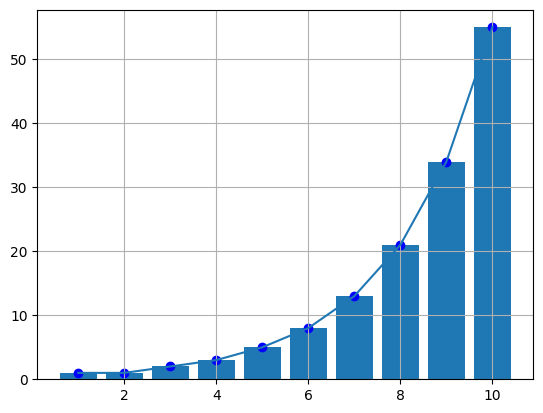

In [ ]:
from functools import lru_cache
import matplotlib.pyplot as plt
%matplotlib inline


@lru_cache(None)
def Fib(n):
    if (n <= 2):
        return 1
    else:
        return Fib(n-1) + Fib(n-2)


a = int(input("Введите число а: "))
X = []
Y = []
for i in range(1, a + 1):
    X.append(i)
    Y.append(Fib(i))

plt.plot(X, Y)
plt.bar(X, Y)
plt.scatter(X, Y, c='blue')
plt.grid()
plt.show()

## Жадный алгоритм раскраски графа



Хроматическо число графа = 3


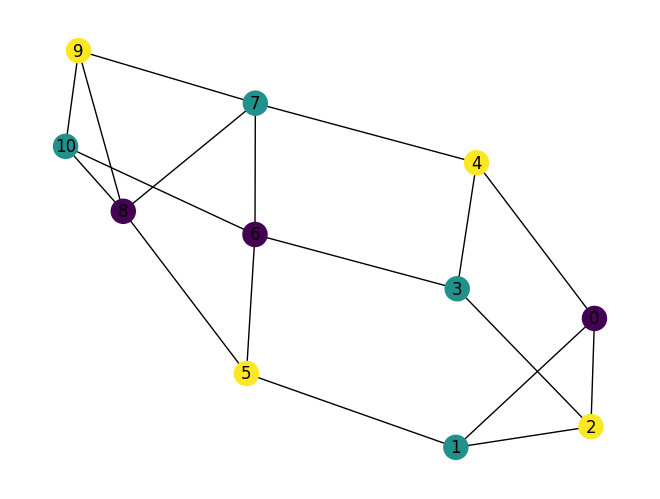

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


def greedy_coloring(graph) -> dict:
    '''
    Greedy coloring algorithm
    '''
    # Создаем словарь для хранения раскраски вершин графа
    coloring = {}

    # Получаем список вершин графа в порядке убывания степени
    vertices = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)

    # Проходим по списку вершин и раскрашиваем их
    for vertex in vertices:
        # Получаем цвета всех соседних вершин
        neighbor_colors = {coloring[neighbor] for neighbor in graph.neighbors(vertex) if neighbor in coloring}

        # Находим наименьший доступный цвет
        # Он будет отличаться от всех соседних цветов
        color = 1
        while color in neighbor_colors:
            color += 1

        # Записываем выбранный цвет для текущей вершины
        coloring[vertex] = color

    return coloring


# Создаем неориентированный граф без петель
graph = nx.Graph()

# Любые графы
# graph.add_edges_from([(1, 2), (1, 8), (1, 6), (1, 7), (1, 3), (2, 6), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6)])
graph.add_edges_from([(0, 1), (0, 2), (0, 4), (1, 2), (1, 5), (2, 3), (3, 4), (3, 6), (4, 7), (5, 6), (5, 8), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6), (10, 9), (7, 9), (8, 10)])


# Вызываем функцию раскраски графа
coloring = greedy_coloring(graph)

count_of_coloring = 0
# Выводим результаты раскраски
for vertex, color in coloring.items():
  # print(f"Вершина раскрашена в цвет {color}")
  if color > count_of_coloring:
    count_of_coloring = color

# Хроматическое число графа:
print(f'Хроматическо число графа = {count_of_coloring}')

# Визуализируем граф с раскраской
nx.draw(graph, with_labels=True, node_color=[coloring.get(vertex, 0) for vertex in graph.nodes()])
plt.show()

## Построение поверхности

Input length: 30


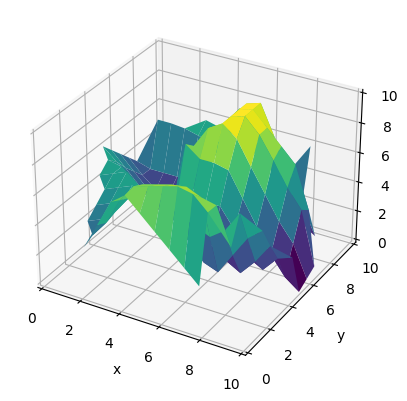

In [13]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint

# ТОЧКИ, ПО КОТОРЫМ СТРОИТЬСЯ ПОВЕРХНОСТЬ
# X = [1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7]
# Y = [1, 4, 5, 6, 1, 4, 5, 6, 1, 4, 5, 6]
# Z = [2, 6, 3, 6, 2, 7, 4, 6, 2, 4, 2, 3]

X = []
Y = []
Z = []

n = int(input('Input length: '))

for i in range(n):
    X.append(int(randint(0, 10)))
    Y.append(int(randint(0, 10)))
    Z.append(int(randint(0, 10)))


plotx, ploty, = np.meshgrid(np.linspace(np.min(X), np.max(X), 15), np.linspace(np.min(Y), np.max(Y), 15))
plotz = interp.griddata((X, Y), Z, (plotx, ploty), method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx, ploty, plotz, cstride=1, rstride=1, cmap='viridis')

# МАСШТАБИРОВАНИЕ
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

# ПОДПИСЫВАЕМ КАЖДУЮ ИЗ ОСЕЙ
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()